<a href="https://colab.research.google.com/github/vikasbairwa/test/blob/master/data__science_test_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("KAG_conversion_data.csv")

In [ ]:
df.head(10)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1
5,708820,916,103929,30-34,M,29,1915,0,0.00,1,1
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0
7,708895,916,103941,30-34,M,16,10951,1,1.27,1,1
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0
9,708958,916,103952,30-34,M,28,9502,3,3.16,1,0


In [ ]:
df.dtypes

xyz_campaign_id          int64
age                     object
gender                   int64
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [ ]:
#no. of campaigns
values = df['xyz_campaign_id'].unique()
values

array([ 916,  936, 1178])

**There are 3 different campaigns**

In [ ]:
df['fb_campaign_id'].unique

<bound method Series.unique of 0       103916
1       103917
2       103920
3       103928
4       103928
         ...  
1138    179977
1139    179978
1140    179979
1141    179981
1142    179982
Name: fb_campaign_id, Length: 1143, dtype: int64>

In [ ]:
df['ad_id'].unique()

array([ 708746,  708749,  708771, ..., 1314412, 1314414, 1314415])

**Lets take care of categorical variables in next step i.e. age and gender.**

In [3]:
df = df.replace({'age': {'30-34': 'a', '35-39': 'b', '40-44' : 'c', '45-49' :'d'}, 'gender':{'M' :0, 'F' : 1}})
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,a,0,15,7350,1,1.430000,2,1
1,708749,916,103917,a,0,16,17861,2,1.820000,2,0
2,708771,916,103920,a,0,20,693,0,0.000000,1,0
3,708815,916,103928,a,0,28,4259,1,1.250000,1,0
4,708818,916,103928,a,0,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,d,1,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,d,1,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,d,1,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,d,1,113,790253,135,198.710000,8,2


In [ ]:
df['Total_Conversion'].sum()

3264

In [ ]:
df['Approved_Conversion'].sum()

1079

Now lets see if there are any missing values.

In [ ]:
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

missing = percent_missing(df)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:10]

Percent of missing data


[('ad_id', 0.0),
 ('xyz_campaign_id', 0.0),
 ('fb_campaign_id', 0.0),
 ('age', 0.0),
 ('gender', 0.0),
 ('interest', 0.0),
 ('Impressions', 0.0),
 ('Clicks', 0.0),
 ('Spent', 0.0),
 ('Total_Conversion', 0.0)]

**There are unique ad_id and fb_campaign_id for each entry so we can get rid of them as they don't provide any significant information.**

In [4]:
df.drop(['fb_campaign_id', 'ad_id'], axis=1, inplace=True)

In [ ]:
#lets check it
df.head(10)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,a,0,15,7350,1,1.43,2,1
1,708749,916,103917,a,0,16,17861,2,1.82,2,0
2,708771,916,103920,a,0,20,693,0,0.00,1,0
3,708815,916,103928,a,0,28,4259,1,1.25,1,0
4,708818,916,103928,a,0,28,4133,1,1.29,1,1
5,708820,916,103929,a,0,29,1915,0,0.00,1,1
6,708889,916,103940,a,0,15,15615,3,4.77,1,0
7,708895,916,103941,a,0,16,10951,1,1.27,1,1
8,708953,916,103951,a,0,27,2355,1,1.50,1,0
9,708958,916,103952,a,0,28,9502,3,3.16,1,0


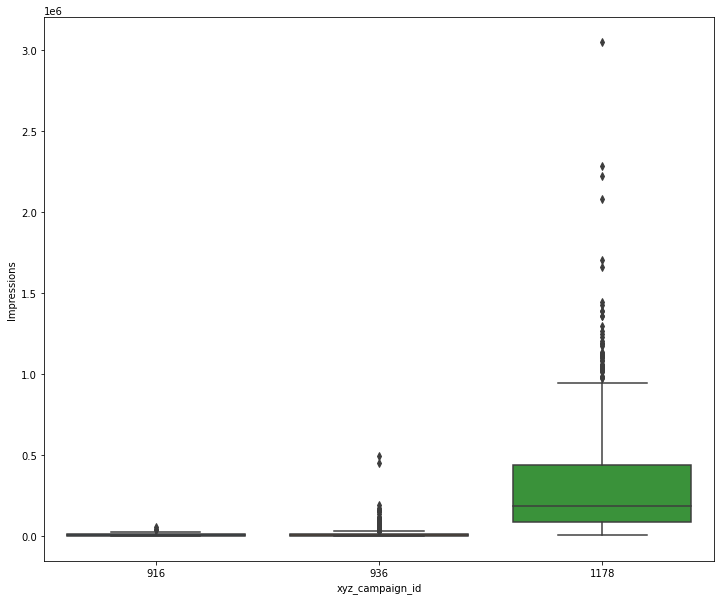

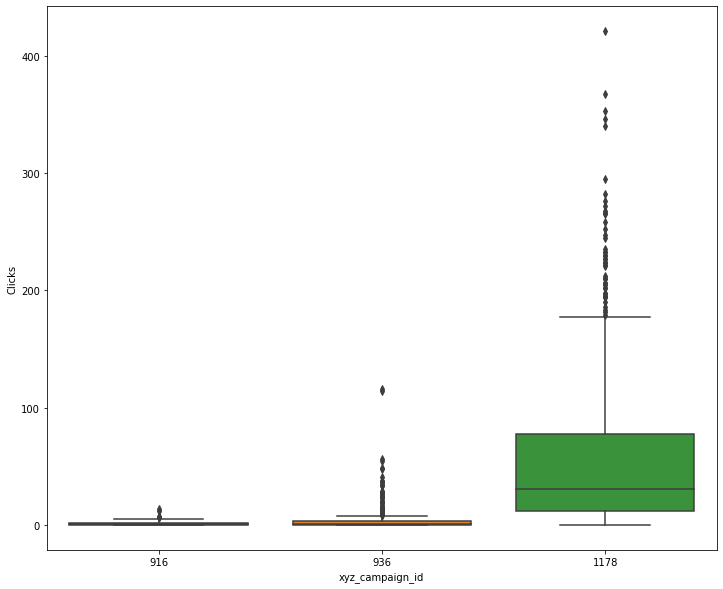

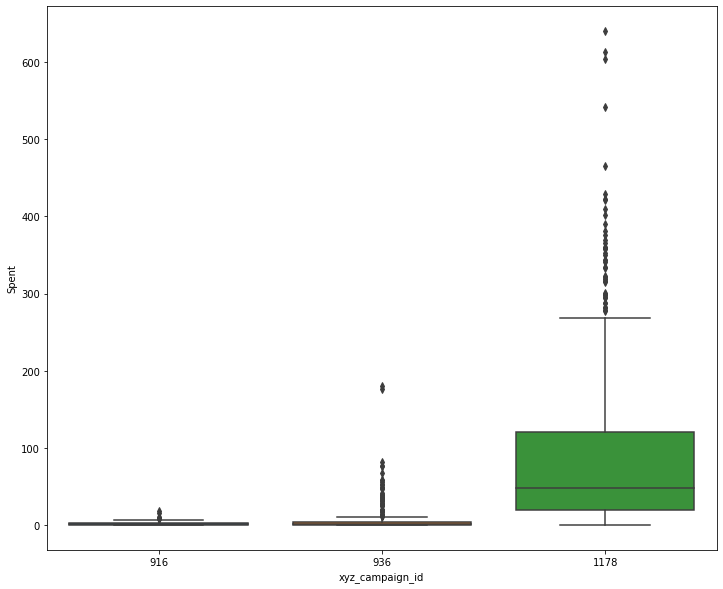

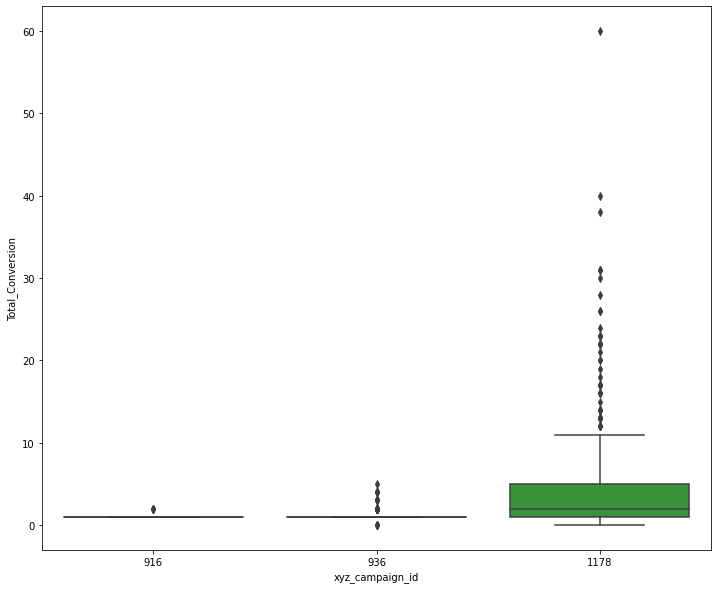

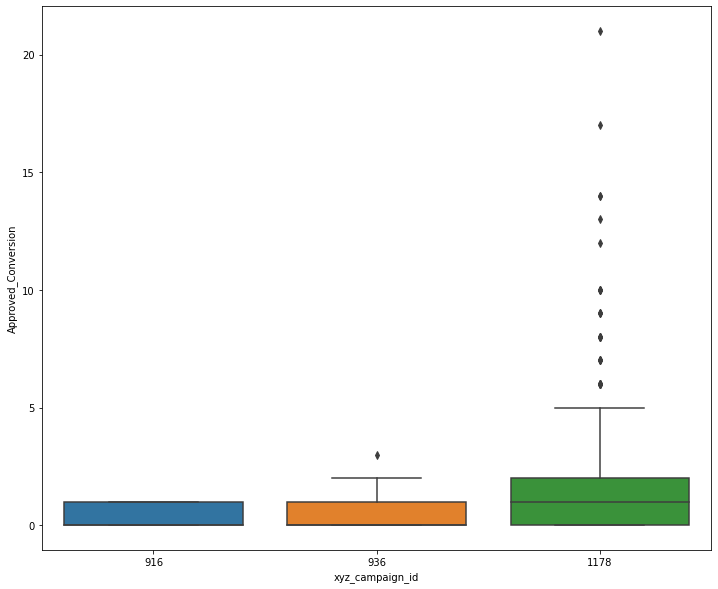

In [ ]:
for i in ['Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion']:
  data = pd.concat([df[i], df['xyz_campaign_id']], axis=1)
  f, ax = plt.subplots(figsize=(12, 10))
  fig = sns.boxplot(x="xyz_campaign_id", y=i, data=data);
  plt.show() #this idea will not give us much insight because even though campaign_id 1178 has more approved_conversion than other tho it also had a lot of impresssions too.

**The above 4 box plots shows campaign 1178 has shown very husge no. of ads to even large no. of peoples compared to other two campaigns. but this does not shows that the campaign 1178 was more successful than other two. for that we need to dig deeper in each campaign individually. But before taht lets not ignore different interests.**

# Now lets do analysis on how different types of interests are popular among the audiance. This will not infer any info about how the ad performed we are just checking the popularity of different types of interest .

In [ ]:
df.sort_values(['interest'], axis=0, inplace=True)
df.head()

,xyz_campaign_id,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_a,age_b,age_c,age_d
0,1178,1,2,82455,15,22.050000,1,0,1,0,0,0
24,1178,0,2,63564,12,20.590000,2,0,0,1,0,0
23,936,0,2,3812,2,3.050000,1,0,0,0,1,0
22,936,0,2,2338,1,0.240000,1,0,1,0,0,0
21,1178,0,2,240123,38,65.670001,5,4,1,0,0,0


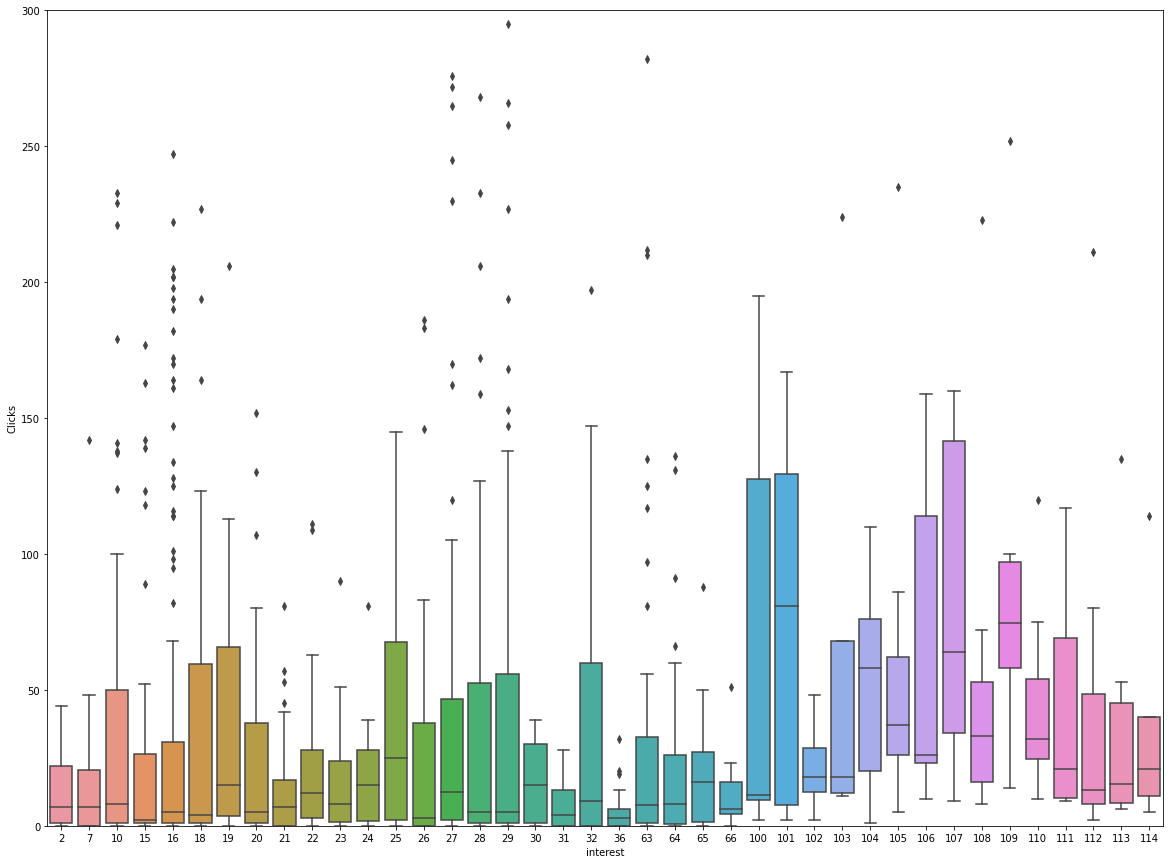

In [ ]:
data = pd.concat([df['Clicks'], df['interest']], axis=1)
f, ax = plt.subplots(figsize=(20, 15))
fig = sns.boxplot(x=df['interest'], y=df['Clicks'], data=data)
fig.axis(ymin=0, ymax=300);

**from above boxplot we can see that interests with code 100, 101, 106, 107 are very popular also we can see interest code 10,16,27,28,29,63 have many ouliers with high no. of clicks.**
**as i said from this box plot we are not drawing conclusions about any particular ad thefore based on outliers we won't judge the popularity of a particular interest.**

# Now lets analyse the data by comparing each type of campaign on the basis of different features

In [ ]:
df.sort_values(['xyz_campaign_id'], axis=0, inplace=True)
f = {
        'Clicks' : 'sum',
        'Impressions' : 'sum',
        'Spent' : 'sum',
        'Total_Conversion' : 'sum',
        'Approved_Conversion' : 'sum',
}

campaign_id_sum = df.groupby(['xyz_campaign_id'])
v = campaign_id_sum.agg(f)
v

,Clicks,Impressions,Spent,Total_Conversion,Approved_Conversion
xyz_campaign_id,,,,,
916,113,482925,149.710001,58,24
936,1984,8128187,2893.369999,537,183
1178,36068,204823716,55662.149959,2669,872


lets introduce more features

In [ ]:
v.insert(5, 'AC/TC',v['Approved_Conversion']/v['Total_Conversion'], True)
v.insert(6, 'AC/C',v['Approved_Conversion']/v['Clicks'], True)
v.insert(7, 'AC/I', v['Approved_Conversion']/v['Impressions'], True)
v.insert(8, 'AC/S', v['Approved_Conversion']/v['Spent'], True)
v.insert(9, 'C/I',v['Clicks']/v['Impressions'], True)
v

,Clicks,Impressions,Spent,Total_Conversion,Approved_Conversion,AC/TC,AC/C,AC/I,AC/S,C/I
xyz_campaign_id,,,,,,,,,,
916,113,482925,149.710001,58,24,0.413793,0.212389,0.000050,0.160310,0.000234
936,1984,8128187,2893.369999,537,183,0.340782,0.092238,0.000023,0.063248,0.000244
1178,36068,204823716,55662.149959,2669,872,0.326714,0.024177,0.000004,0.015666,0.000176


Lets refer to plots for better understandings.

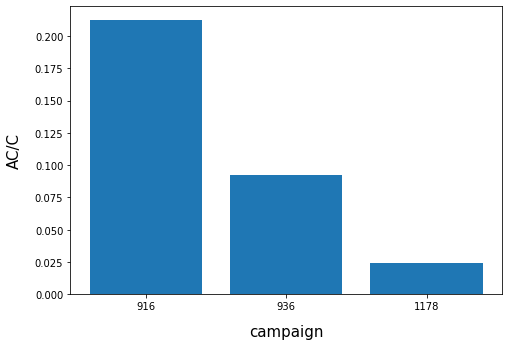

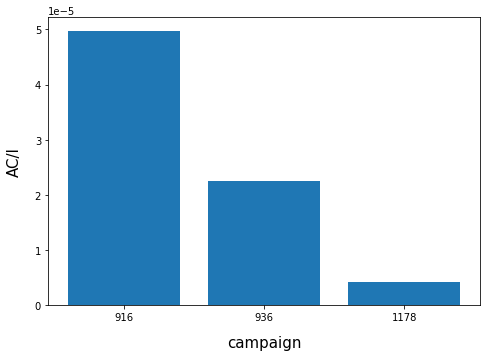

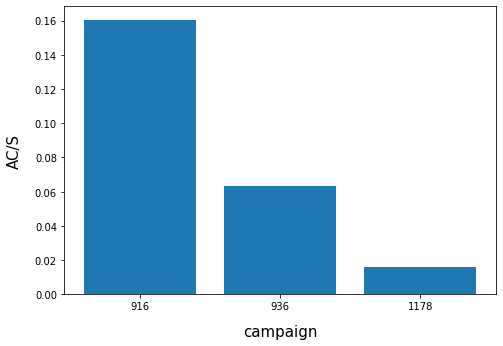

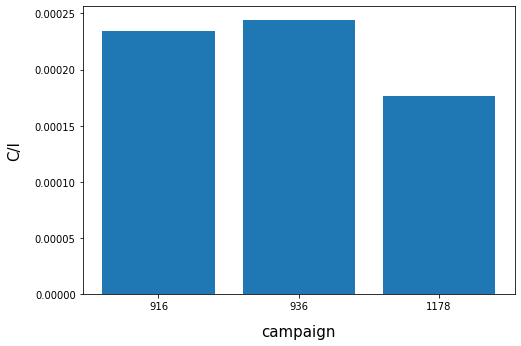

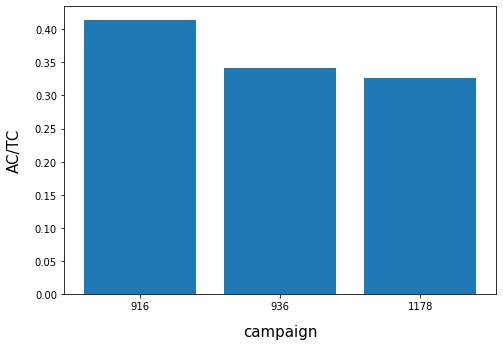

In [ ]:
for i in ['AC/C',	'AC/I',	'AC/S',	'C/I', 'AC/TC']:
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  campaign_id	 = ['916', '936', '1178']
  ax.bar(campaign_id,v[i])
  plt.ylabel('{}'.format(i), size=15,labelpad=12.5)
  plt.xlabel('campaign', size=15, labelpad=12.5)
plt.show()


**Above five bar graps shows that campaign 916 was more succesfull and efficient than the other two irrespective of any particular age group or interest.**

## Lets see the various correlations b/w features and labels. 



Text(0.5, 1.0, 'heatmap of campaign 916')

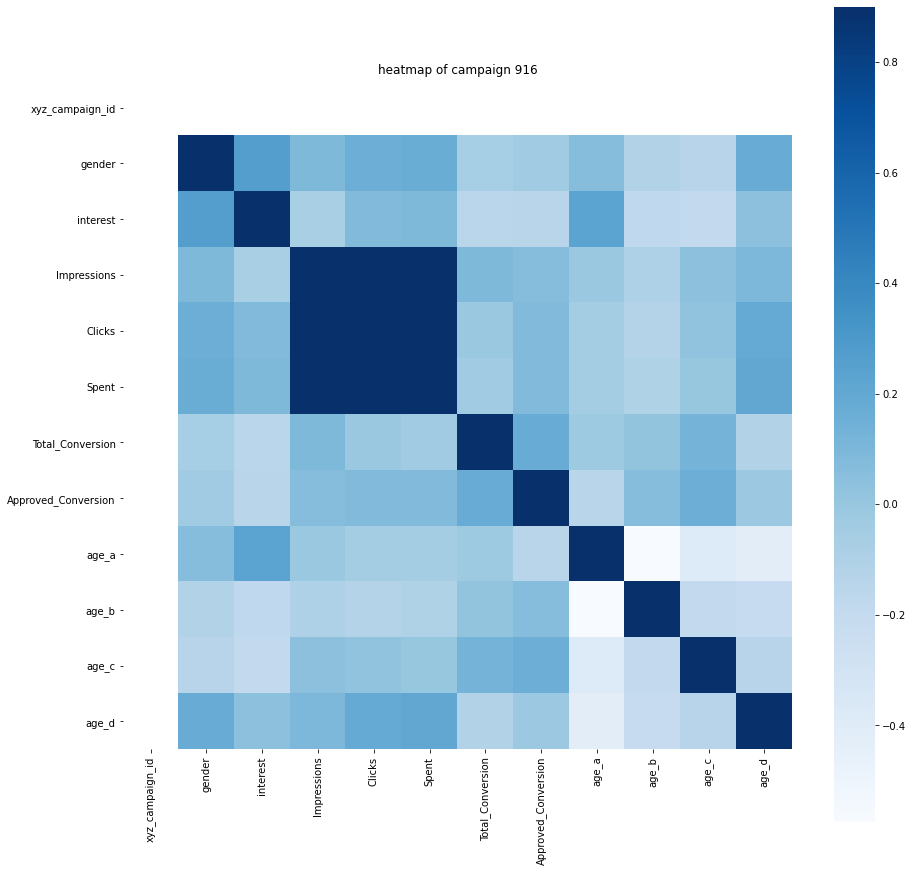

In [ ]:
df_916 = df.loc[df['xyz_campaign_id'] == 916]
df_916.groupby(['interest'])
df['interest'].astype('string')
df = pd.get_dummies(df).reset_index(drop=True)

corr = df_916.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)
plt.title('heatmap of campaign 916')

**above heatmap shows the correlation betweet label(approved_conversion) and features. approved conversion does not correlate strongly with any of the features but mildly with total_conversion which was a bit expected.**

Text(0.5, 1.0, 'heatmap of campaign 936')

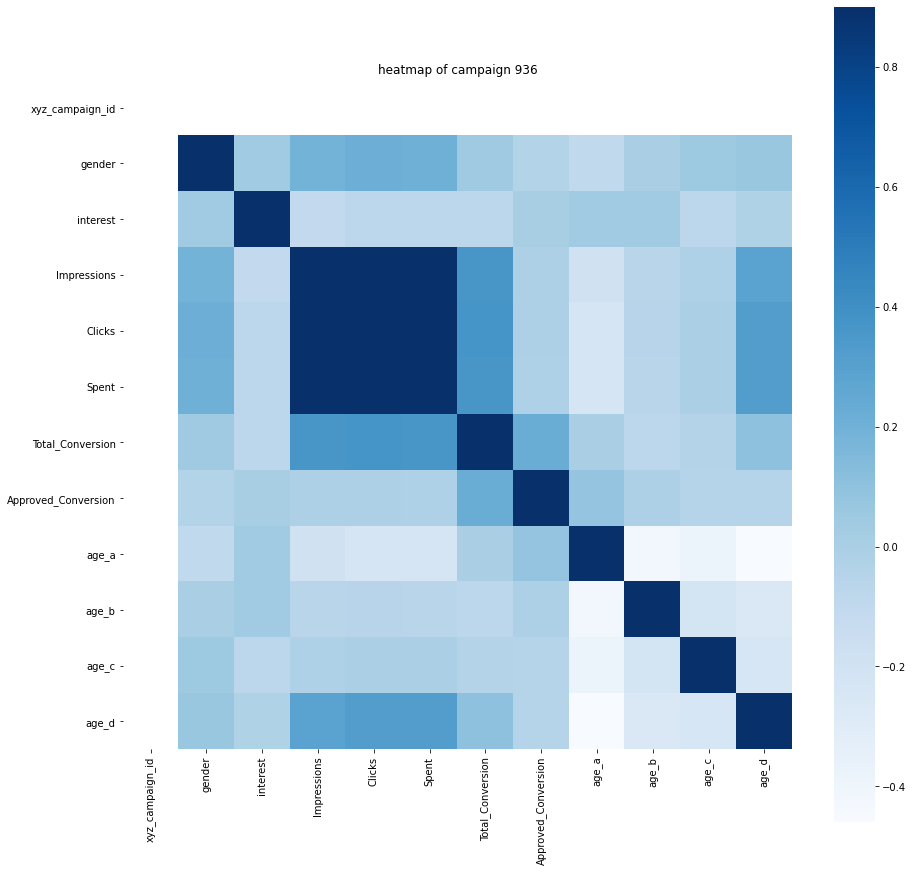

In [ ]:
df_936 = df.loc[df['xyz_campaign_id'] == 936]
df_936.sort_values(by='Approved_Conversion', ascending=False)
corr = df_936.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)
plt.title('heatmap of campaign 936')

**heatmap shows that approved conversion (label) correlates mildly with total conversion just like in the case of campaign_916.**

Text(0.5, 1.0, 'heatmap of campaign 1178')

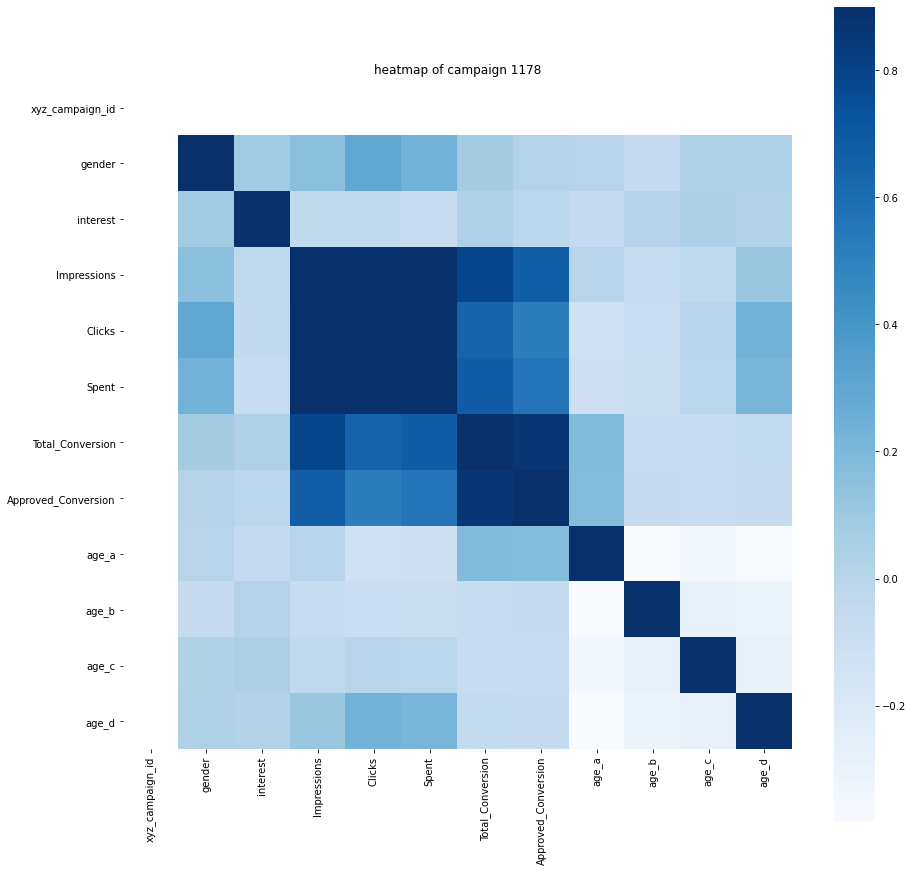

In [ ]:
df_1178 = df.loc[df['xyz_campaign_id'] == 1178]
df_1178.sort_values(by='Approved_Conversion', ascending=False)
corr = df_1178.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)
plt.title('heatmap of campaign 1178')

**in the above heatmap we can see approved conversions correlates with total_conversion very strongly and very first time shows any significant correlation with spent, clicks and impressions, which we were expecting but missing in the previous two campaigns. This might be due to the large no. of different ads shown in this campaign compared to previous two.**

*significance: features like spent, click and impressions can't be ignored. *

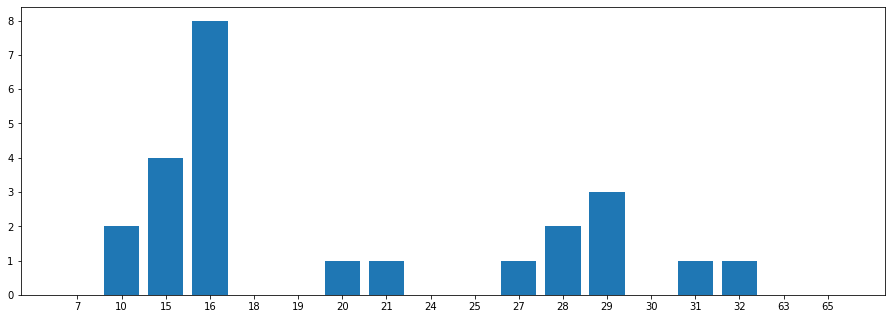

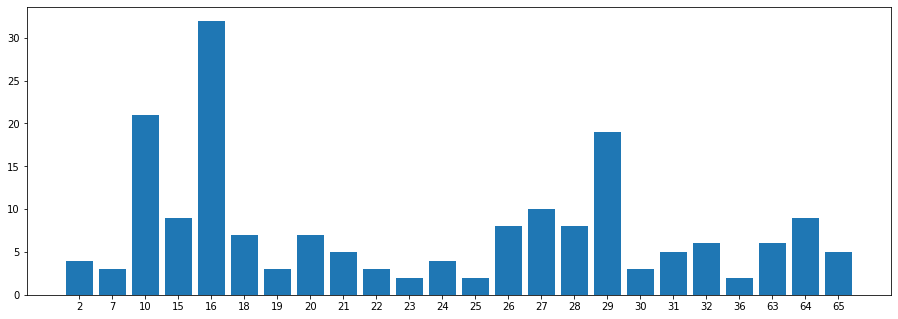

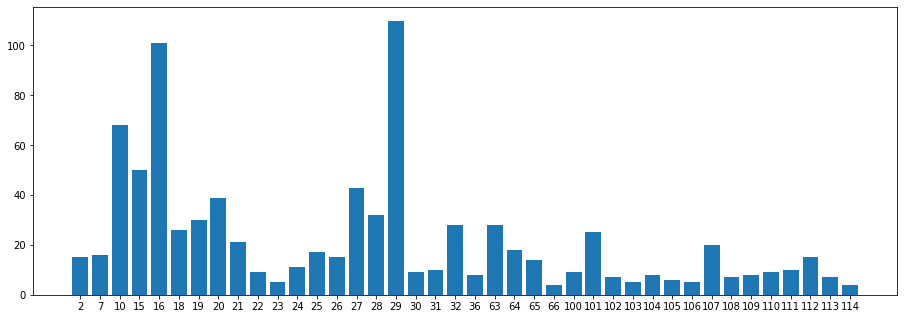

In [ ]:
for d in [df_916, df_936, df_1178]:
  df2 = d[['interest', 'Approved_Conversion']]
  f = {
      'Approved_Conversion' : 'sum'
  }
  campaign_id_sum = df2.groupby(['interest'])
  v = campaign_id_sum.agg(f)
  v.reset_index(inplace=True)
  interests = v['interest'].astype('string')
  approved_conversion = v['Approved_Conversion']
  fig = plt.figure()
  ax = fig.add_axes([0,0,2,1])
  ax.bar(interests,approved_conversion, width=0.8)
plt.show()

**from the bar graph above we can see that campaign 916 was quiet successful in case of interest 15 and 16;  campaign 936 did great in the case of interests 10, 16 and 29; campaign 1178 did great in the case of interests 10, , 15, 16, 20, 27 and 29.**

# we havent seen the effect of different age group on the succcess of an ad. so lets do that next.

(-0.5, 3.5, 0.0, 10.0)

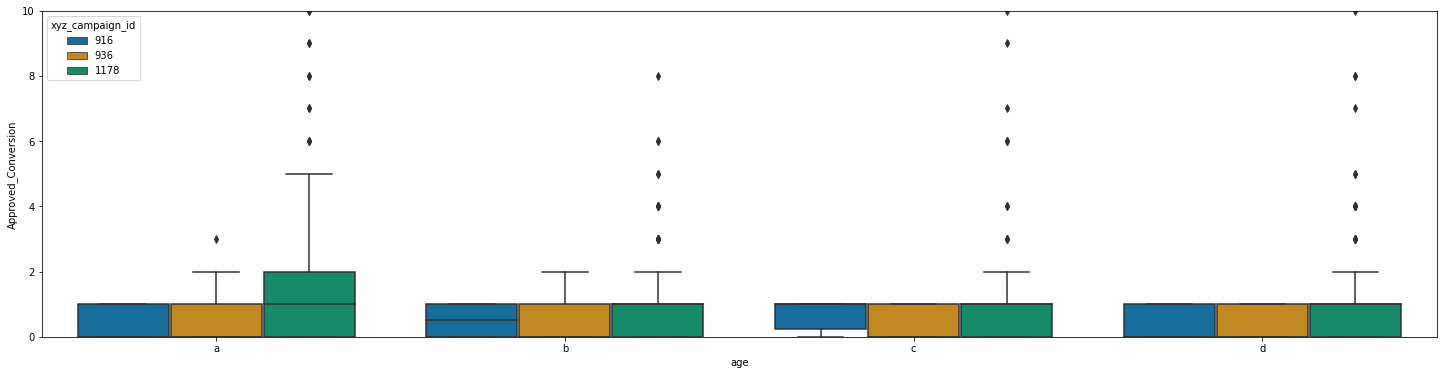

In [ ]:
f, ax = plt.subplots(figsize=(25, 6))
fig = sns.boxplot(y='Approved_Conversion', x='age',
                 data=df, 
                 palette="colorblind", 
                  hue='xyz_campaign_id') #'30-34': 'a', '35-39': 'b', '40-44' : 'c', '45-49' :'d
fig.axis(ymin=0, ymax=10)

(-0.5, 3.5, 0.0, 300.0)

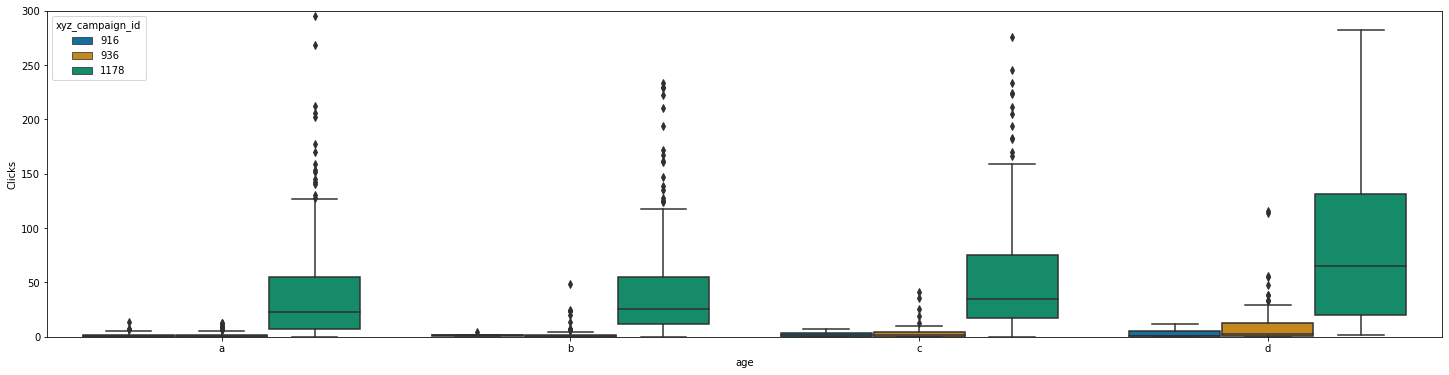

In [7]:
f, ax = plt.subplots(figsize=(25, 6))
fig = sns.boxplot(y='Clicks', x='age',
                 data=df, 
                 palette="colorblind", 
                  hue='xyz_campaign_id') #'30-34': 'a', '35-39': 'b', '40-44' : 'c', '45-49' :'d
fig.axis(ymin=0, ymax=300)

key insights:

*   campaign_916 was the most efficient one.
*   ads shown to interest 16 in each campaign had most approved conversions.
*   most people the ads were shown to were male.
*   people from age group 45-49 were seen more interested in ads irrespective of the campaign_id
*   but approved conversions see a somewhat constant trend throughout every group except the people of age 40-44 targeted by campaign 916.

**other insights are added in between the various sections of code for step by step analysis.**





> 